#### Importing Libraries

In [3]:
# Importing pandas for data manipulation
import pandas as pd

# Importing matplotlib for plotting
import matplotlib.pyplot as plt

# Importing seaborn for enhanced statistical data visualization
import seaborn as sns

# Setting seaborn default styling for plots
sns.set()

# Importing KNNImputer for handling missing data using K-nearest neighbors
from sklearn.impute import KNNImputer

# Importing XGBClassifier for gradient boosting classification model
from xgboost import XGBClassifier

# Importing RandomForestClassifier for ensemble tree-based classification
from sklearn.ensemble import RandomForestClassifier

# Importing train_test_split to split data into training and testing sets
from sklearn.model_selection import train_test_split

# Importing LogisticRegression for logistic regression classification model
from sklearn.linear_model import LogisticRegression

# Importing classification_report to generate detailed classification metrics
from sklearn.metrics import classification_report

# Importing warnings module to control warning messages
import warnings

# Suppressing all warnings to keep output clean
warnings.filterwarnings("ignore")


#### Loading dataset

In [4]:
# Reading the second sheet (sheet index 1) from the Excel file into a pandas DataFrame
dataset = pd.read_excel("dataset/E Commerce Dataset.xlsx", sheet_name=1)

In [5]:
# Displaying the first 5 rows of the dataset to get an overview of the data
dataset.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


In [6]:
# Checking if there are any duplicate values in the 'CustomerID' column
dataset['CustomerID'].duplicated().any()

False

In [7]:
# Dropping the 'CustomerID' column from the dataset as it's likely not useful for modeling
dataset = dataset.drop('CustomerID', axis=1)

#### EDA

In [8]:
# Displaying the shape of the dataset (number of rows and columns)
dataset.shape

(5630, 19)

In [9]:
# Displaying information about the dataset, including column names, data types, and non-null counts
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Churn                        5630 non-null   int64  
 1   Tenure                       5366 non-null   float64
 2   PreferredLoginDevice         5630 non-null   object 
 3   CityTier                     5630 non-null   int64  
 4   WarehouseToHome              5379 non-null   float64
 5   PreferredPaymentMode         5630 non-null   object 
 6   Gender                       5630 non-null   object 
 7   HourSpendOnApp               5375 non-null   float64
 8   NumberOfDeviceRegistered     5630 non-null   int64  
 9   PreferedOrderCat             5630 non-null   object 
 10  SatisfactionScore            5630 non-null   int64  
 11  MaritalStatus                5630 non-null   object 
 12  NumberOfAddress              5630 non-null   int64  
 13  Complain          

#### Checking for Null values

In [10]:
# Counting missing (null) values in each column and sorting them in descending order
dataset.isnull().sum().sort_values(ascending=False)

DaySinceLastOrder              307
OrderAmountHikeFromlastYear    265
Tenure                         264
OrderCount                     258
CouponUsed                     256
HourSpendOnApp                 255
WarehouseToHome                251
Churn                            0
MaritalStatus                    0
Complain                         0
NumberOfAddress                  0
PreferedOrderCat                 0
SatisfactionScore                0
NumberOfDeviceRegistered         0
Gender                           0
PreferredPaymentMode             0
CityTier                         0
PreferredLoginDevice             0
CashbackAmount                   0
dtype: int64

In [11]:
# Generating descriptive statistics for numerical columns (count, mean, std, min, max, etc.)
dataset.describe()

,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5366.000000,5630.000000,5379.000000,5375.000000,5630.000000,5630.000000,5630.000000,5630.000000,5365.000000,5374.000000,5372.000000,5323.000000,5630.000000
mean,0.168384,10.189899,1.654707,15.639896,2.931535,3.688988,3.066785,4.214032,0.284902,15.707922,1.751023,3.008004,4.543491,177.223030
std,0.374240,8.557241,0.915389,8.531475,0.721926,1.023999,1.380194,2.583586,0.451408,3.675485,1.894621,2.939680,3.654433,49.207036
min,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,0.000000,2.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,145.770000
50%,0.000000,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.280000
75%,0.000000,16.000000,3.000000,20.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.392500
max,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,26.000000,16.000000,16.000000,46.000000,324.990000


##### Checking for class imbalance

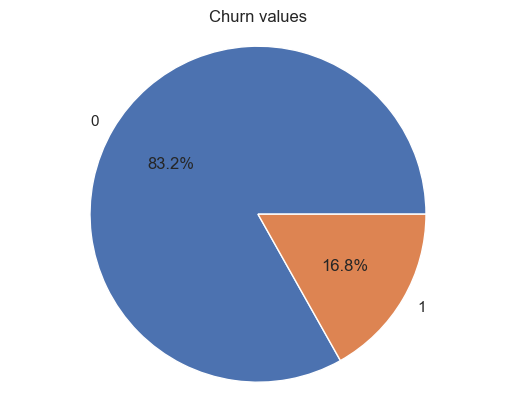

In [12]:
# Defining a function to plot a pie chart for the given column in the dataset
def plot_pie_chart(dataset, column_name):
    # Count the number of occurrences for each unique value in the 'Churn' column
    column_counts = dataset['Churn'].value_counts()

    # Plotting a pie chart using the counts, with labels and percentage display
    plt.pie(column_counts.values, labels=column_counts.index, autopct='%1.1f%%')

    # Setting the title of the pie chart
    plt.title(f'Churn values')

    # Ensuring the pie chart is a circle
    plt.axis('equal')

    # Display the pie chart
    plt.show()

# Calling the function to plot the pie chart for the 'Churn' column
plot_pie_chart(dataset, 'Churn')


In [13]:
# # Separating columns based on number of unique values
# count_col = []  # For categorical-like columns (≤ 20 unique values)
# hist_col = []   # For numerical-like columns (> 20 unique values)

# for column in dataset.columns:
#     unique_value = dataset[column].nunique()
#     if unique_value <= 20:
#         count_col.append(column)
#     else:
#         hist_col.append(column)

# # Plotting count plots for each categorical column
# plt.figure(figsize=(15, 40))  # Set the figure size
# plot_num = 1

# for col in count_col:
#     plt.subplot(10, 2, plot_num)  # Creating a subplot grid: 10 rows, 2 columns
#     sns.countplot(data=dataset, x=col)
#     plt.title(f'Countplot of {col}')
#     plt.xticks(rotation=45)  # Rotating x-axis labels for better visibility
#     plot_num += 1
#     plt.tight_layout()  # Adjusting layout to avoid overlapping


#### Removing Duplicates form Categorical columns

In [14]:
# Identifying categorical columns by selecting columns with dtype 'object'
categorical_cols = dataset.dtypes[dataset.dtypes == 'object'].index

# Loop through each categorical column
for i in categorical_cols:
    # Printing column name and its unique values
    print(f"{i} ---> {dataset[i].unique()}")
    print()  # Printing a blank line for better readability between columns


PreferredLoginDevice ---> ['Mobile Phone' 'Phone' 'Computer']

PreferredPaymentMode ---> ['Debit Card' 'UPI' 'CC' 'Cash on Delivery' 'E wallet' 'COD' 'Credit Card']

Gender ---> ['Female' 'Male']

PreferedOrderCat ---> ['Laptop & Accessory' 'Mobile' 'Mobile Phone' 'Others' 'Fashion' 'Grocery']

MaritalStatus ---> ['Single' 'Divorced' 'Married']



In [15]:
# Looping through each categorical column to clean text data
for i in categorical_cols:
    # Converting each value to lowercase and replace spaces with underscores
    dataset[i] = dataset[i].apply(lambda x: x.lower().replace(" ", "_"))


In [16]:
# Replacing "phone" with "mobile_phone" in 'PreferredLoginDevice' column to unify naming
dataset["PreferredLoginDevice"].replace("phone", "mobile_phone", inplace=True)

# Replacing abbreviations "cc" and "cod" with full forms "credit_card" and "cash_on_delivery" in 'PreferredPaymentMode' column
dataset["PreferredPaymentMode"].replace(["cc", "cod"], ["credit_card", "cash_on_delivery"], inplace=True)

# Correcting spelling/formatting by replacing "mobile_phone" with "mobile" in 'PreferedOrderCat' column
dataset["PreferedOrderCat"].replace("mobile_phone", "mobile", inplace=True)


In [17]:
# Looping through each column name in the list categorical_cols
for i in categorical_cols:
    # Print the column name followed by its unique values in the dataset
    print(f"{i} ---> {dataset[i].unique()}")
    # Print a blank line for better readability between columns
    print()


PreferredLoginDevice ---> ['mobile_phone' 'computer']

PreferredPaymentMode ---> ['debit_card' 'upi' 'credit_card' 'cash_on_delivery' 'e_wallet']

Gender ---> ['female' 'male']

PreferedOrderCat ---> ['laptop_&_accessory' 'mobile' 'others' 'fashion' 'grocery']

MaritalStatus ---> ['single' 'divorced' 'married']



In [18]:
# Encoding categorical columns before handling missing values
dataset = pd.get_dummies(dataset, drop_first = True)

In [19]:
# corr_matrix = dataset.corr()

# # Plotting the correlation heatmap
# plt.figure(figsize=(20, 12))
# sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
# plt.title('Correlation Heatmap of Numerical Features')
# plt.show()

#### Handling Nan values

In [20]:
# Creating a KNNImputer object with 5 nearest neighbors for imputing missing values
impute = KNNImputer(n_neighbors = 5)

# Fiting the imputer on the dataset and transform it to fill missing values, returning a new array
dataset_imp = impute.fit_transform(dataset)


In [21]:
# Converting the imputed NumPy array back into a DataFrame with the original dataset’s column names
dataset_imp = pd.DataFrame(dataset_imp, columns = dataset.columns)


In [22]:
# Displaying the first five rows of the imputed DataFrame to inspect the changes
dataset_imp.head()

,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,...,PreferredPaymentMode_debit_card,PreferredPaymentMode_e_wallet,PreferredPaymentMode_upi,Gender_male,PreferedOrderCat_grocery,PreferedOrderCat_laptop_&_accessory,PreferedOrderCat_mobile,PreferedOrderCat_others,MaritalStatus_married,MaritalStatus_single
0,1.0,4.0,3.0,6.0,3.0,3.0,2.0,9.0,1.0,11.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,1.0,10.0,1.0,8.0,3.0,4.0,3.0,7.0,1.0,15.0,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
2,1.0,6.4,1.0,30.0,2.0,4.0,3.0,6.0,1.0,14.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
3,1.0,0.0,3.0,15.0,2.0,4.0,5.0,8.0,0.0,23.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
4,1.0,0.0,1.0,12.0,2.4,3.0,5.0,3.0,0.0,11.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0


#### Seperating data into data and labels

In [23]:
# Showing the column names of the imputed DataFrame
dataset_imp.columns

Index(['Churn', 'Tenure', 'CityTier', 'WarehouseToHome', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress',
       'Complain', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount',
       'PreferredLoginDevice_mobile_phone', 'PreferredPaymentMode_credit_card',
       'PreferredPaymentMode_debit_card', 'PreferredPaymentMode_e_wallet',
       'PreferredPaymentMode_upi', 'Gender_male', 'PreferedOrderCat_grocery',
       'PreferedOrderCat_laptop_&_accessory', 'PreferedOrderCat_mobile',
       'PreferedOrderCat_others', 'MaritalStatus_married',
       'MaritalStatus_single'],
      dtype='object')

In [24]:
# Creating feature set 'x' by dropping the target column "Churn" from the imputed dataset
x = dataset_imp.drop(columns = ["Churn"])

# Converting categorical variables in 'x' to dummy/one-hot encoded variables, dropping the first category to avoid dummy variable trap
X = pd.get_dummies(x, drop_first = True)

# Set target variable 'y' as the "Churn" column from the imputed dataset
y = dataset_imp["Churn"]


#### Spliting data in testing and training

In [25]:
# Spliting the features and target into training and testing sets (80% train, 20% test) with a fixed random state for reproducibility
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

### Implementing Models

#### Logistic Regression

In [23]:
# Initializing a Logistic Regression model with a fixed random state for reproducibility
log = LogisticRegression(random_state=123)

# Training (fit) the Logistic Regression model on the training data
log.fit(x_train, y_train)

LogisticRegression(random_state=123)

In [24]:
# Use the trained Logistic Regression model to predict target values for the test features
y_pred = log.predict(x_test)

# Printing a detailed classification report comparing the true test labels and predicted labels
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.91      0.96      0.94       938
         1.0       0.74      0.53      0.61       188

    accuracy                           0.89      1126
   macro avg       0.82      0.74      0.78      1126
weighted avg       0.88      0.89      0.88      1126



#### Random Forest

In [27]:
# Initializing a Random Forest Classifier with a fixed random state for reproducibility
rf = RandomForestClassifier(
    n_estimators=10,
    max_depth=3, 
    min_samples_split=50,
    min_samples_leaf=20, 
    max_features='sqrt',
    random_state=123
)

# Training (fit) the Random Forest model on the training data
rf.fit(x_train, y_train)

# Predicting the target values for the test set using the trained Random Forest model
y_pred_rf = rf.predict(x_test)

# Printing a header for the Random Forest classification report
print("Random Forest Classification Report:")

# Printing the classification report comparing true and predicted test labels for the Random Forest model
print(classification_report(y_test, y_pred_rf))

Random Forest Classification Report:
              precision    recall  f1-score   support

         0.0       0.86      0.99      0.92       938
         1.0       0.82      0.22      0.34       188

    accuracy                           0.86      1126
   macro avg       0.84      0.60      0.63      1126
weighted avg       0.86      0.86      0.83      1126



#### XGBoost Classifier

In [ ]:
# Initializing an XGBoost Classifier with label encoder disabled, using logloss for evaluation, and a fixed random state
xgb = XGBClassifier(
    n_estimators=10, 
    max_depth=3,     
    min_child_weight=10,
    subsample=0.5,  
    colsample_bytree=0.5,
    learning_rate=0.3, 
    use_label_encoder=False, 
    eval_metric='logloss', 
    random_state=123
)

# Training (fit) the XGBoost model on the training data
xgb.fit(x_train, y_train)

# Predicting the target values for the test set using the trained XGBoost model
y_pred_xgb = xgb.predict(x_test)

# Printing a header for the XGBoost classification report
print("XGBoost Classification Report:")

# Printing the classification report comparing true and predicted test labels for the XGBoost model
print(classification_report(y_test, y_pred_xgb))


XGBoost Classification Report:
              precision    recall  f1-score   support

         0.0       0.90      0.97      0.93       938
         1.0       0.74      0.45      0.56       188

    accuracy                           0.88      1126
   macro avg       0.82      0.71      0.74      1126
weighted avg       0.87      0.88      0.87      1126

